# Api de Spotify

In [1]:
! pip install spotipy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


                    name  popularity  duration_minutes formatted_duration
0               Gasolina          85          3.210000               3:12
1               La Santa          83          3.440333               3:26
2      Lo Que Pasó, Pasó          82          3.515550               3:30
4        Ella Me Levanto          81          3.491550               3:29
3              Despacito          81          3.822667               3:49
6             Yankee 150          80          4.044450               4:02
5              Con Calma          80          3.220433               3:13
9  Llamado de Emergencia          79          3.998667               3:59
8        Soltera (Remix)          76          4.434767               4:26
7                  China          71          5.028567               5:01


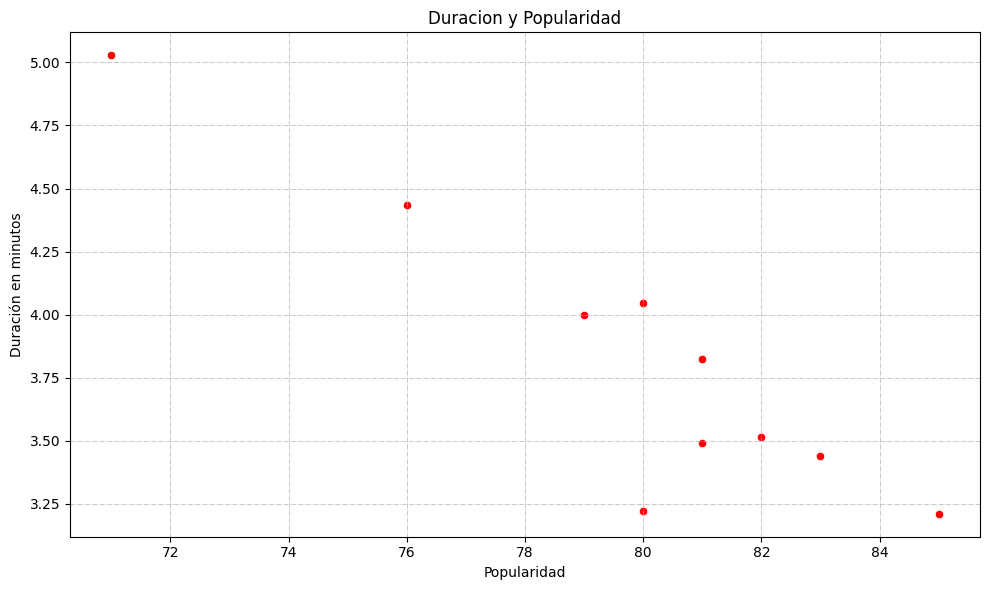

In [4]:
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


def best_tracks(artist_id):
    con = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                                client_secret=client_secret))
    response = con.artist_top_tracks(artist_id)
    return response['tracks'] if response else []

def procesado(tracks):
    data = []
    for track in tracks:
        minutes = track["duration_ms"] // (1000 * 60)
        seconds = (track["duration_ms"] // 1000) % 60
        duration_minutes = track["duration_ms"] / (1000 * 60)
        data.append({
            "name": track["name"],
            "popularity": track["popularity"],
            "duration_minutes": duration_minutes,
            "formatted_duration": f"{minutes}:{seconds:02}"
        })
    return data


load_dotenv()

client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')      
artist_id = "4VMYDCV2IEDYJArk749S6m"
tracks = best_tracks(artist_id)
processed_tracks = procesado(tracks)
tracks_df = pd.DataFrame.from_records(processed_tracks)
tracks_df.sort_values(["popularity"], inplace=True)
print(tracks_df.head(10).iloc[::-1])
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=tracks_df, x="popularity", y="duration_minutes", color="r")
plt.title("Duracion y Popularidad")
plt.ylabel("Duración en minutos")
plt.xlabel("Popularidad")
plt.grid(True, which='both', linestyle='-.', linewidth=0.5)
plt.tight_layout()
plt.savefig("Grafica.png")

Podemos apreciar que a medida que la canción dura menos, obtiene más popularidad.